<a href="https://colab.research.google.com/github/jaidonlybbert/EEP596/blob/main/HW2/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem 1

In [2]:
import torch
import numpy as np

### (a) Tensor

Construct an uninitialized 4x4 matrix:





In [3]:
# todo
x = torch.empty(4,4)
print(x)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


Construct a randomly initialized 3x3 matrix from a uniform distribution on the interval [0, 10)

In [4]:
# todo
x = torch.rand(3,3) * 10
print(x)

tensor([[0.3297, 5.5163, 3.8884],
        [2.2247, 8.1161, 6.9328],
        [9.2101, 9.8567, 8.6127]])


Construct a 2x2 matrix filled zeros with data type float32:

In [5]:
# todo
from torch import float32


x = torch.zeros(2,2, dtype=float32)
print(x)

tensor([[0., 0.],
        [0., 0.]])


Construct a 2x2 matrix from the normal distribution with zero mean and one std with the same shape as x. 

y's data type should be float32. 

Print the size of x and y.

In [6]:
# todo
mean = torch.zeros_like(x)
y = torch.normal(mean, x)
print(y)
# todo: print the size of x and y
print(x.shape)
print(y.shape)

tensor([[0., 0.],
        [0., 0.]])
torch.Size([2, 2])
torch.Size([2, 2])


### (b) Operations

Addition: Print x + y

In [7]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)
print(x)
print(y)
# todo
print(x+y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[4., 5.],
        [6., 7.]])
tensor([[ 5.,  7.],
        [ 9., 11.]])


Addition: add y and x inplace (modify y)

In [8]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)

# todo: adds x to y
y.add_(x)

print(y)

tensor([[ 5.,  7.],
        [ 9., 11.]])


Indexing

In this part, you will use indexing techniques to access part of data store in tensor **x**.
x is a 3x3x3 matrix.

For simplicity, we let (a, b, c) represents the a-th in the first axis, b-th in the second axis and c-th in the third axis, a, b and c start from 0, 

e.g get x at (0, 1, 1) is to get the first in the first axis, second in the second axis and second in the third axis of x, which returns 5. 

We also let getting x at (0:2, 1, 1) mean get the first two rows in the first axis, second in the second axis and second in the third axis.

Hint: You should use standard NumPy-like indexing.


In [9]:
x = torch.arange(1, 28, dtype=torch.int32).reshape(3, 3, 3)
print(x)
# Example: get (0, 1, 1) of x
print(x[0, 1, 1])
# Example: get (0:2, 1, 1) of x
print(x[0:2, 1, 1])

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]], dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor([ 5, 14], dtype=torch.int32)


In [10]:
# todo: get (1, 2, 1) of x
print(x[1, 2, 1])

# todo: get (0, 1:3, 1) of x
print(x[0, 1:3, 1])

# todo: get (1:3, 0:3, 1:3) of x
print(x[1:3, 0:3, 1:3])


tensor(17, dtype=torch.int32)
tensor([5, 8], dtype=torch.int32)
tensor([[[11, 12],
         [14, 15],
         [17, 18]],

        [[20, 21],
         [23, 24],
         [26, 27]]], dtype=torch.int32)


Resizing

In [11]:
A = torch.arange(12)

# todo: resize A to 3x4 using view
print(A.view(3, 4))

# todo: resize A to 4x3 using reshape
print(A.view(4, 3))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


Question: what is the difference between view and reshape of a tensor?

A view shares the same underlying data in memory as the original matrix, and can only operate on tensors store in contiguous memory

A reshape can operate on tensors stored in contiguous or non-contiguous memory, and may return a copy of the tensor stored in physically separate memory.

## Problem 2

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [12]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [13]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')
!unzip "/content/gdrive/MyDrive/EEP596/mnist.zip" -d "/content"

ModuleNotFoundError: No module named 'google'

Load MNIST dataset from your Google Drive. 

Different from HW1, we downsample the data from 28x28 to 14x14.
The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

In [ ]:
from scipy.io import loadmat
import torch
import torchvision.transforms as T


mnist = loadmat('/content/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.

# convert data to torch, normalize and reshape
data = torch.reshape(torch.from_numpy(mnist['traindata']).to(torch.float)/255.0 - 0.5, (mnist['traindata'].shape[0], 1, 28, 28))
testdata = torch.reshape(torch.from_numpy(mnist['testdata']).to(torch.float)/255.0 - 0.5, (mnist['testdata'].shape[0], 1, 28, 28))

trainlabels = torch.from_numpy(mnist['trainlabels'].ravel()[:50000])
validlabels = torch.from_numpy(mnist['trainlabels'].ravel()[50000:])

resize = T.Resize((14,14))
data = resize(data)
testdata = resize(testdata)
traindata = data[:50000]
validdata = data[50000:]


print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

torch.Size([50000, 1, 14, 14])
torch.Size([50000])
torch.Size([10000, 1, 14, 14])
torch.Size([10000])
torch.Size([10000, 1, 14, 14])


In [16]:
from torch.utils.data import TensorDataset, DataLoader

mnist_train = TensorDataset(traindata, trainlabels)
mnist_valid = TensorDataset(validdata, validlabels)
mnist_valid_loader = DataLoader(mnist_valid, batch_size=1)

NameError: name 'traindata' is not defined



Visualize an image with label.

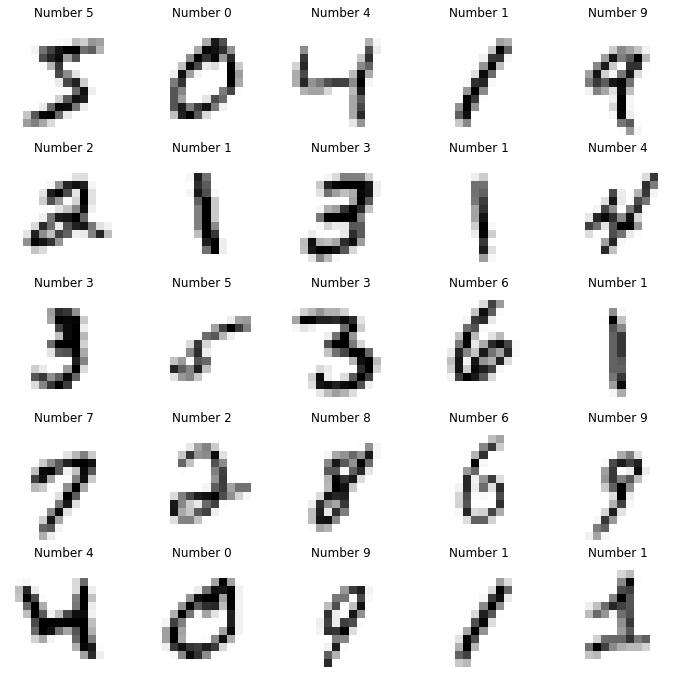

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow((mnist_train[i][0] + 0.5 ).reshape((14, 14)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

(b) Multilayer Perceptron (MLP)

Use MLP to achieve image classification.

Define the following MLP using PyTorch to do image classification on MNIST dataset according to the below figure:
Number of hidden layers: 3
Number of neurons in the layers: [100, 50, 20]
Activation functions: ReLU()
Dropout for all hidden layers: 30%
Output layer + softmax


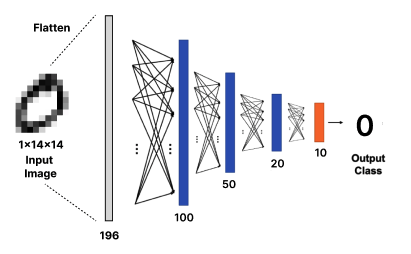

To feed the data into the MLP, each image with dim of $1 \times 14 \times 14$ needs to be flatten into a vector with dim of $196.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [21]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # TODO: define your MLP
    self.fc1 = nn.Linear(196, 100)
    self.fc2 = nn.Linear(100, 50)
    self.fc3 = nn.Linear(50, 20)

    self.fc4 = nn.Linear(20, 10)

    self.dropout = nn.Dropout(0.30)

    

  def forward(self, x):
    # TODO: define your forward function
    x = x.view(196)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.softmax(F.relu(self.fc4(x)), dim=0)
    return x


In [ ]:
# TODO: write your training code
def train(model, loss_func, optimizer):
  # input = mnist_train[0][0]
  # mlp = MLP()
  # out = mlp(input)
  # print(out)
  train_dataloader = DataLoader(mnist_train, batch_size=1, shuffle=True)

  for batch, (X, train_label) in enumerate(train_dataloader):
    pred = model(X)

    y = torch.zeros_like(pred)
    y[train_label[0].item()] = 1.0

    loss = loss_func(pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 1000 == 0:
      print(f"Loss: {loss.item()}")

# TODO: write your testing code
def test(dataloader, model, loss_func):

  size = len(dataloader.dataset)
  num_batches = len(dataloader)
  test_loss, correct = 0, 0

  with torch.no_grad():
    for X, train_label in dataloader:
      pred = model(X)
      y = torch.zeros_like(pred)
      y[train_label[0].item()] = 1.0
      test_loss += loss_func(pred, y)
      correct += (pred.argmax() == train_label[0].item()).type(torch.float).sum().item()
  
  test_loss /= num_batches
  correct /= size

  print(f"Accuracy: {100*correct:.1f}% \nAvg Loss: {test_loss:8f}")
  


In [ ]:
mlp = MLP().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [ ]:
n_epoch = 10
# todo: use your train() to train the model
train(mlp, criterion, optimizer)

Loss: 1.4611501693725586
Loss: 2.4360644817352295
Loss: 1.5207734107971191
Loss: 2.2883100509643555
Loss: 1.4616241455078125
Loss: 1.509702205657959
Loss: 2.4611399173736572
Loss: 2.4339137077331543
Loss: 2.4567887783050537
Loss: 1.4611501693725586
Loss: 1.461450219154358
Loss: 1.6508598327636719
Loss: 1.4611501693725586
Loss: 1.4611952304840088
Loss: 2.3221583366394043
Loss: 2.4605789184570312
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 2.4611501693725586
Loss: 2.276370048522949
Loss: 1.4611501693725586
Loss: 1.468863844871521
Loss: 2.2977023124694824
Loss: 1.4620574712753296
Loss: 1.4611501693725586
Loss: 2.4175310134887695
Loss: 2.3379101753234863
Loss: 1.4616457223892212
Loss: 2.257906913757324
Loss: 1.4611502885818481
Loss: 1.4611501693725586
Loss: 2.4257988929748535
Loss: 1.49254310131073
Loss: 1.4611501693725586
Loss: 1.4612187147140503
Loss: 1.461203694343567
Loss: 2.3906309604644775
Loss: 1.

Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [ ]:
PATH = '/content/gdrive/MyDrive/EEP596/mlp_mnist.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [ ]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

<All keys matched successfully>

Evaluate the classfication performance on the testing set.

In [ ]:
print(mlp)
# todo: use your test() to test your MLP on val set
test(mnist_valid_loader, mlp, criterion)

MLP(
  (fc1): Linear(in_features=196, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Accuracy: 73.1% 
Avg Loss: 1.729573


(c) Convolution Neural Network (CNN)

Built a LeNet-5 using PyTorch to do image classification. Develop the CNN from the PyTorch NN tutorial introduced in class. 

Note: 
1. The input image dimension shown in the figure below is different from the one we have in this problem.
2. Use kernel size=3 for both convolutions (Original LeNet-5 uses kernel size=5 as shown in the Fig.3 of HW2.pdf)


In [14]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cv1 = nn.Conv2d(1, 6, 3)
    self.cv2 = nn.Conv2d(6, 16, 3)

    self.fc1 = nn.Linear(16 * 2 * 2, 50)
    self.fc2 = nn.Linear(50, 30)
    self.fc3 = nn.Linear(30, 10)

    self.dropout = nn.Dropout(0.30)

  def forward(self, x):
    # TODO: define your forward function
    x = F.max_pool2d(F.relu(self.cv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.cv2(x)), (2, 2))

    x = x.view(64)
    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = F.softmax(self.fc3(x), dim=0)

    return x

cnn_mnist = CNN().to(device)  # operate on GPU

NameError: name 'device' is not defined

In [ ]:
# todo: similar to MLP, train your CNN model

train_dataloader = DataLoader(mnist_train, batch_size=1, shuffle=True)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_mnist.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

for batch, (X, train_label) in enumerate(train_dataloader):
  pred = cnn_mnist(X)

  y = torch.zeros_like(pred)
  y[train_label[0].item()] = 1.0

  loss = loss_func(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if batch % 1000 == 0:
    print(f"Loss: {loss.item()}")

Loss: 2.308344602584839
Loss: 2.3546195030212402
Loss: 1.8699355125427246
Loss: 2.3571419715881348
Loss: 2.441141128540039
Loss: 1.4661999940872192
Loss: 1.4611538648605347
Loss: 1.5835192203521729
Loss: 1.4619232416152954
Loss: 2.2658777236938477
Loss: 1.4611501693725586
Loss: 1.9676941633224487
Loss: 1.5333374738693237
Loss: 1.4611505270004272
Loss: 1.4611501693725586
Loss: 1.4611506462097168
Loss: 1.4611501693725586
Loss: 1.4623656272888184
Loss: 1.476853370666504
Loss: 1.4612165689468384
Loss: 1.4611505270004272
Loss: 1.4611501693725586
Loss: 1.4623628854751587
Loss: 1.4611501693725586
Loss: 1.4930408000946045
Loss: 2.461019277572632
Loss: 1.4611530303955078
Loss: 1.9942758083343506
Loss: 1.4611501693725586
Loss: 2.184875965118408
Loss: 1.4611502885818481
Loss: 1.4611501693725586
Loss: 1.4611998796463013
Loss: 2.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.4611501693725586
Loss: 1.461308479309082
Loss: 1.4611501693725586
Loss: 

In [ ]:
print(cnn_mnist)
# todo: use your test() to test your CNN on val set

size = len(mnist_valid_loader.dataset)
num_batches = len(mnist_valid_loader)
test_loss, correct = 0, 0

with torch.no_grad():
  for X, train_label in mnist_valid_loader:
    pred = cnn_mnist(X)
    y = torch.zeros_like(pred)
    y[train_label[0].item()] = 1.0
    test_loss += loss_func(pred, y)
    correct += (pred.argmax() == train_label[0].item()).type(torch.float).sum().item()

test_loss /= num_batches
correct /= size

print(f"Accuracy: {100*correct:.1f}% \nAvg Loss: {test_loss:8f}")

CNN(
  (cv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (cv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=64, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=10, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)
Accuracy: 88.5% 
Avg Loss: 1.577006


## Problem 3: Image Classification by CNN

Write code to load and visualize the CIFAR-10 dataset.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [17]:
from torch.utils.data import TensorDataset, DataLoader
from torchvision import transforms, datasets

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_trainset = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_loader = DataLoader(cifar10_trainset, batch_size=len(cifar10_trainset), shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=len(cifar10_testset), shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


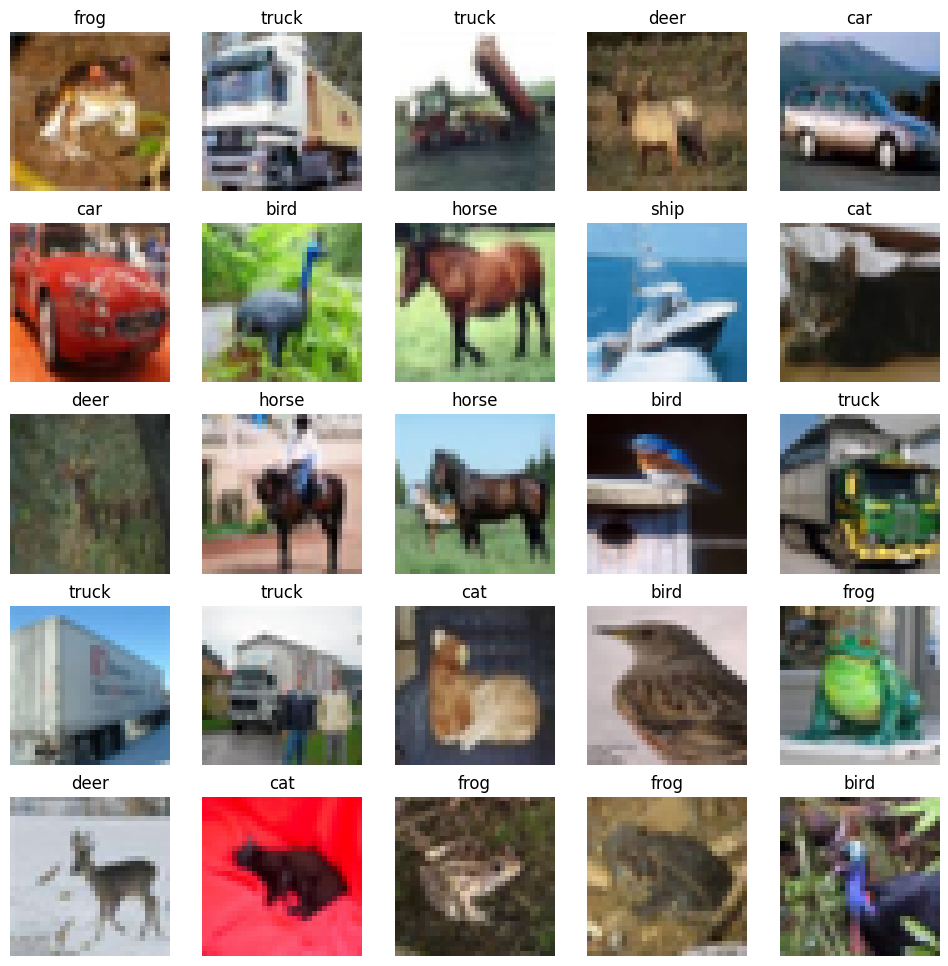

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset
fig, axs = plt.subplots(5, 5, figsize = (12, 12))

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(cifar_imshow(cifar10_trainset[i][0]))
  ax.axis('off')
  ax.set_title(f'{classes[cifar10_trainset[i][1]]}')

#### Data Augmentation

In [19]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomAffine(0, (0.1, 0.1))
    ])

# Rotating: randomly rotate the images by some angles.
transform3 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomAffine(70)
    ])

# Flipping: horizontally flip the images.
transform4 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.RandomHorizontalFlip(1.0)
    ])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.GaussianBlur(3)
    ]
)

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  augmented_dataset.append(datasets.CIFAR10(root='./data/', train=True, download=True, transform=t))

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform1)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous problem and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

(1) Define a CNN using PyTorch to do image classification. Develop the CNN from the previous PyTorch NN tutorial.

In [98]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN
    self.cv1 = nn.Conv2d(3, 6, 3)
    self.cv2 = nn.Conv2d(6, 16, 3)

    self.fc1 = nn.Linear(576, 600)
    self.fc2 = nn.Linear(600, 200)
    self.fc3 = nn.Linear(200, 60)
    self.fc4 = nn.Linear(60, 10)

    self.dropout = nn.Dropout(0.30)

  def forward(self, x):
    # TODO: define your forward function
    # x = self.cv1(x)
    # x = F.relu(x)
    # x = F.max_pool2d(x)
    x = F.max_pool2d(F.relu(self.cv1(x)), (2, 2))
    x = F.max_pool2d(F.relu(self.cv2(x)), (2, 2))

    x = x.view(-1, self.num_flat_features(x))

    print()

    x = self.dropout(F.relu(self.fc1(x)))
    x = self.dropout(F.relu(self.fc2(x)))
    x = self.dropout(F.relu(self.fc3(x)))
    x = F.softmax(self.fc4(x), dim=0)

    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features=1
    for s in size:
      num_features *= s
    return num_features

cnn1 = CNN1().to(device)  # operate on GPU

Define a loss function and optimizer.

In [99]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

In [109]:
# todo: use your train() to train your cnn1
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=128, shuffle=False)

for batch, (X, train_label) in enumerate(cifar_train_loader):
  dev_images = X.to(device)
  dev_train_labels = train_label.to(device)
  pred = cnn1(dev_images)

  y = torch.zeros_like(pred)
  for (i, row) in enumerate(y):
    y[i][dev_train_labels[i].item()] = 1.0

  loss = criterion(pred, y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if batch % 100 == 0:
    print(f"Loss: {loss.item()}")


Loss: 2.3011531829833984




































































































Loss: 2.2955589294433594




































































































Loss: 2.304936170578003




































































































Loss: 2.3004438877105713




































































































Loss: 2.306356430053711




































































































Loss: 2.3070240020751953




































































































Loss: 2.3017308712005615




































































































Loss: 2.301037311553955




































































































Lo

Evaluate the classfication performance on the testing set.

In [111]:
# todo: use your test() to test your cnn1
size = len(cifar_test_loader.dataset)
num_batches = len(cifar_test_loader)
test_loss, correct = 0, 0

with torch.no_grad():
  for batch, (X, train_label) in enumerate(cifar_test_loader):
    dev_images = X.to(device)
    dev_train_labels = train_label.to(device)
    pred = cnn1(dev_images)

    y = torch.zeros_like(pred)
    for (i, row) in enumerate(y):
      y[i][dev_train_labels[i].item()] = 1.0
      correct += (pred[i].argmax() == train_label[i].item()).type(torch.float).sum().item()

    test_loss += criterion(pred, y)

test_loss /= num_batches
correct /= size

print(f"Accuracy: {100*correct:.1f}% \nAvg Loss: {test_loss:8f}")
















































































Accuracy: 17.9% 
Avg Loss: 2.288306


(2) Try different network parameters/configurations (at least 5 combinations). 

You should try to achieve at least **80%** accuracy on the CIFAR-10 testing set using one of your network configuration.


Performances using different configurations

todo: past your performance v.s different network configurations in a table.

####  Discussion

(1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

(2) Based on your experiments in Problem3, which parameter can potentially affect your performance most?

